This is the code for a trading algorithm described by @NeuralNine on Youtube.

url : https://www.youtube.com/watch?v=FEDBsbTFG1o

Before you dive right in, few things :
1. The original code used Yahoo Finance API, which for some reason did not work at the time of writing this code. So, instead Alpha Vantage is used as source for the financial data.
2. The financial data from Alpha Vantage does not include Adjusted Closing Price. The Close price values are taken into consideration instead. This might lead to incorrect results. (refer: https://www.investopedia.com/terms/a/adjusted_closing_price.asp for information on adj close price)

Further scope :
1. Implementing the profit function over historical data
2. Checking the changes in results over different moving averages
   (If possible, minimising the loss function for two moving averages)

In [2]:
# importing dependencies

import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt

plt.style.use("dark_background")

We are going to be looking at the moving-average. Moving-average is the average price over the last n days (n = 30, 50, 100, etc)

In [3]:
ma_1 = 30
ma_2 = 100

So here we have two moving averages. We're going to look at both of them simultaneously and when they cross each other, we'll decide to buy/sell. That is the simple algorithm.

In [4]:
# defining the timeframe

start = dt.datetime.now() - dt.timedelta(days = 365 * 3)
end = dt.datetime.now()

# fetchng data using Alpha Vantage
API_KEY = '[API_key]'
symbol = 'META'

data = pdr.av.time_series.AVTimeSeriesReader(symbol, api_key=API_KEY).read()
print(data.head())

             open   high    low    close     volume
2012-05-18  42.05  45.00  38.00  38.2318  573576400
2012-05-21  36.53  36.66  33.00  34.0300  168192700
2012-05-22  32.61  33.59  30.94  31.0000  101786600
2012-05-23  31.37  32.50  31.36  32.0000   73600000
2012-05-24  32.95  33.21  31.77  33.0300   50237200


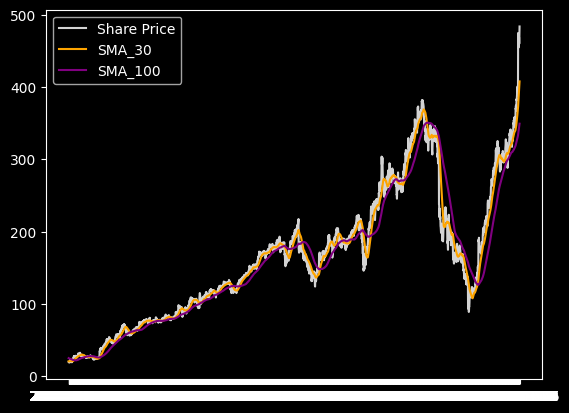

In [5]:
data[f'SMA_{ma_1}'] = data['close'].rolling(window=ma_1).mean()
data[f'SMA_{ma_2}'] = data['close'].rolling(window=ma_2).mean()

data = data.iloc[ma_2:]

plt.plot(data['close'], label="Share Price", color="lightgray")
plt.plot(data[f'SMA_{ma_1}'], label=f"SMA_{ma_1}", color="orange")
plt.plot(data[f'SMA_{ma_2}'], label=f"SMA_{ma_2}", color="purple")
plt.legend(loc="upper left")

plt.show()

In [6]:
buy_signals = []
sell_signals = []
trigger = 0

for x in range (len(data)):
    if data[f'SMA_{ma_1}'].iloc[x] > data[f'SMA_{ma_2}'].iloc[x] and trigger != 1:
        buy_signals.append(data['close'].iloc[x])
        sell_signals.append(float('nan'))
        trigger = 1
    elif data[f'SMA_{ma_1}'].iloc[x] < data[f'SMA_{ma_2}'].iloc[x] and trigger != -1:
        buy_signals.append(float('nan'))
        sell_signals.append(data['close'].iloc[x])
        trigger = -1
    else:
        buy_signals.append(float('nan'))
        sell_signals.append(float('nan'))

data['Buy Signals'] = buy_signals
data['Sell Signals'] = sell_signals

print(data)

              open     high       low     close    volume      SMA_30  \
2012-10-10   19.93   19.940   19.4500   19.6400  39321800   20.579800   
2012-10-11   19.88   19.960   19.6100   19.7500  21817300   20.601467   
2012-10-12   19.75   19.800   19.4800   19.5181  18809400   20.615787   
2012-10-15   19.68   19.880   19.4900   19.5200  20189700   20.664520   
2012-10-16   19.68   19.690   19.3000   19.4800  21834700   20.722887   
...            ...      ...       ...       ...       ...         ...   
2024-02-09  472.95  473.590  467.4650  468.1100  18413137  391.868667   
2024-02-12  468.19  479.145  466.5800  468.9000  19381963  395.554667   
2024-02-13  456.87  467.890  455.0900  460.1200  20916602  399.093333   
2024-02-14  467.93  474.110  466.0901  473.2800  16858401  403.326333   
2024-02-15  475.28  488.620  472.2200  484.0300  24212326  407.978333   

               SMA_100  Buy Signals  Sell Signals  
2012-10-10   24.990390          NaN         19.64  
2012-10-11   24.847

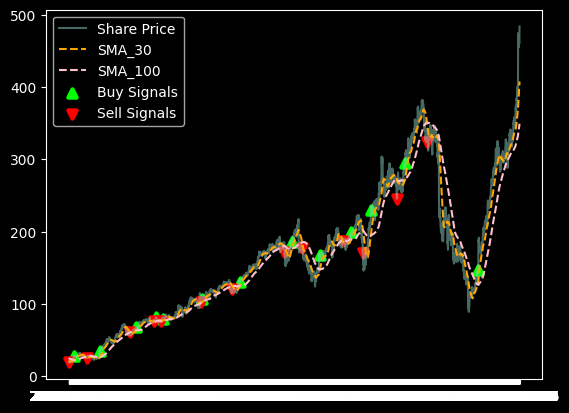

In [7]:
plt.plot(data['close'], label="Share Price", alpha=0.5)
plt.plot(data[f'SMA_{ma_1}'], label=f"SMA_{ma_1}", color="orange", linestyle="--")
plt.plot(data[f'SMA_{ma_2}'], label=f"SMA_{ma_2}", color="pink", linestyle="--")
plt.scatter(data.index, data['Buy Signals'], label="Buy Signals", marker = "^", color="#00ff00", lw=3)
plt.scatter(data.index, data['Sell Signals'], label="Sell Signals", marker = "v", color="#ff0000", lw=3)
plt.legend(loc="upper left")

plt.show()